# **Projeto Capstone: Sugestões para o RH com base em dados**

## **Estágios PACE**

Neste projeto, vamos seguir as etapas do framework PACE: **Plano, Análise, Construção e Execução**.

## **Pace: Plano**

O objetivo deste projeto é analisar um conjunto de dados de RH da Salifort Motors para construir um modelo preditivo que identifique os fatores que mais contribuem para a saída de um funcionário. Com base nesses insights, poderemos fornecer sugestões práticas ao departamento de RH para melhorar a retenção de talentos.

### Etapa 1: Importações e Carregamento dos Dados

Vamos começar importando as bibliotecas necessárias e carregando o conjunto de dados.

In [20]:
# Importação de pacotes para manipulação e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para exibir todas as colunas do dataframe
pd.set_option('display.max_columns', None)

# Importação de modelos de Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Importação de métricas de avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Carregamento do dataset
df0 = pd.read_csv("data/HR_capstone_dataset.csv")

# Exibindo as 5 primeiras linhas do dataframe
print("### 5 Primeiras Linhas do Dataset ###")
print(df0.head())

### 5 Primeiras Linhas do Dataset ###
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   



### Etapa 2: Exploração Inicial e Limpeza dos Dados

Nesta fase, vamos realizar uma Análise Exploratória de Dados (EDA) inicial para entender melhor as variáveis e limpar o dataset, tratando valores ausentes, dados redundantes e outliers.

#### Informações Básicas sobre os Dados

In [21]:
# Obtendo informações básicas sobre o dataset
print("### Informações Básicas do Dataset ###")
df0.info()

### Informações Básicas do Dataset ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Estatísticas Descritivas

In [22]:



# Obtendo estatísticas descritivas
print("### Estatísticas Descritivas ###")
print(df0.describe())


### Estatísticas Descritivas ###
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%     

#### Renomeando Colunas

Para padronizar os nomes das colunas, vamos convertê-los para o formato `snake_case`.

In [23]:
# Renomeando as colunas
df0 = df0.rename(columns={
    'Work_accident': 'acidente_trabalho',
    'average_montly_hours': 'media_horas_mensais',
    'time_spend_company': 'tempo_empresa',
    'Department': 'departamento',
    'promotion_last_5years': 'promocao_ultimos_5_anos',
    'satisfaction_level': 'nivel_satisfacao',
    'last_evaluation': 'ultima_avaliacao',
    'number_project': 'numero_projetos',
    'salary': 'salario'
})

# Verificando os novos nomes das colunas
print("### Nomes das Colunas Atualizados ###")
print(df0.columns)

### Nomes das Colunas Atualizados ###
Index(['nivel_satisfacao', 'ultima_avaliacao', 'numero_projetos',
       'media_horas_mensais', 'tempo_empresa', 'acidente_trabalho', 'left',
       'promocao_ultimos_5_anos', 'departamento', 'salario'],
      dtype='object')


In [39]:
df0.isnull().sum()

nivel_satisfacao           0
ultima_avaliacao           0
numero_projetos            0
media_horas_mensais        0
tempo_empresa              0
acidente_trabalho          0
left                       0
promocao_ultimos_5_anos    0
departamento               0
salario                    0
dtype: int64

#### Verificação de Valores Duplicados e Ausentes

In [24]:
# Verificando valores ausentes
print(f"Valores ausentes por coluna:\n{df0.isna().sum()}")

# Verificando valores duplicados
print(f"\nNúmero de linhas duplicadas: {df0.duplicated().sum()}")

Valores ausentes por coluna:
nivel_satisfacao           0
ultima_avaliacao           0
numero_projetos            0
media_horas_mensais        0
tempo_empresa              0
acidente_trabalho          0
left                       0
promocao_ultimos_5_anos    0
departamento               0
salario                    0
dtype: int64

Número de linhas duplicadas: 3008


Existem 3.008 linhas duplicadas. Como é improvável que diferentes funcionários tenham exatamente os mesmos dados em todas as colunas (incluindo variáveis contínuas), vamos remover essas duplicatas.

In [25]:
# Removendo as duplicatas
df1 = df0.drop_duplicates(keep='first')

# Verificando o novo tamanho do dataframe
print("### Informações após remover duplicatas ###")
df1.info()

### Informações após remover duplicatas ###
<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   nivel_satisfacao         11991 non-null  float64
 1   ultima_avaliacao         11991 non-null  float64
 2   numero_projetos          11991 non-null  int64  
 3   media_horas_mensais      11991 non-null  int64  
 4   tempo_empresa            11991 non-null  int64  
 5   acidente_trabalho        11991 non-null  int64  
 6   left                     11991 non-null  int64  
 7   promocao_ultimos_5_anos  11991 non-null  int64  
 8   departamento             11991 non-null  object 
 9   salario                  11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


#### Verificação de Outliers

Vamos usar um boxplot para visualizar a distribuição da variável `tempo_empresa` e identificar possíveis outliers.

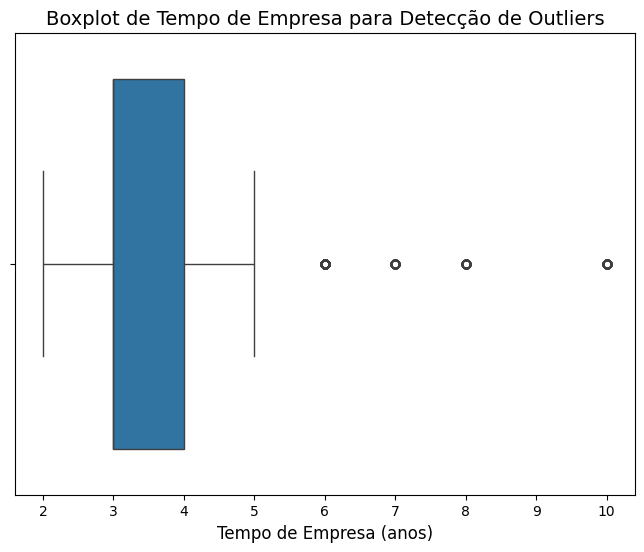

In [26]:
# Criando um boxplot para a coluna 'tempo_empresa'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1['tempo_empresa'])
plt.title('Boxplot de Tempo de Empresa para Detecção de Outliers', fontsize=14)
plt.xlabel('Tempo de Empresa (anos)', fontsize=12)
plt.show()

## **Pace: Análise**

Agora vamos aprofundar a Análise Exploratória de Dados (EDA) para entender as relações entre as variáveis.

### Análise da Variável `left` (Saída de Funcionários)

In [27]:
# Contagem e porcentagem de funcionários que saíram vs. que ficaram
print("### Contagem de Funcionários que Saíram vs. Ficaram ###")
print(df1['left'].value_counts())
print("\n### Porcentagem de Funcionários que Saíram vs. Ficaram ###")
print(df1['left'].value_counts(normalize=True))

### Contagem de Funcionários que Saíram vs. Ficaram ###
left
0    10000
1     1991
Name: count, dtype: int64

### Porcentagem de Funcionários que Saíram vs. Ficaram ###
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Visualizações de Dados

**Sugestão de Adaptação:** Em vez de um boxplot e histograma empilhados, vamos usar um **violin plot** para visualizar a distribuição das `media_horas_mensais` por `numero_projetos` e um **countplot** para a distribuição do `numero_projetos`.

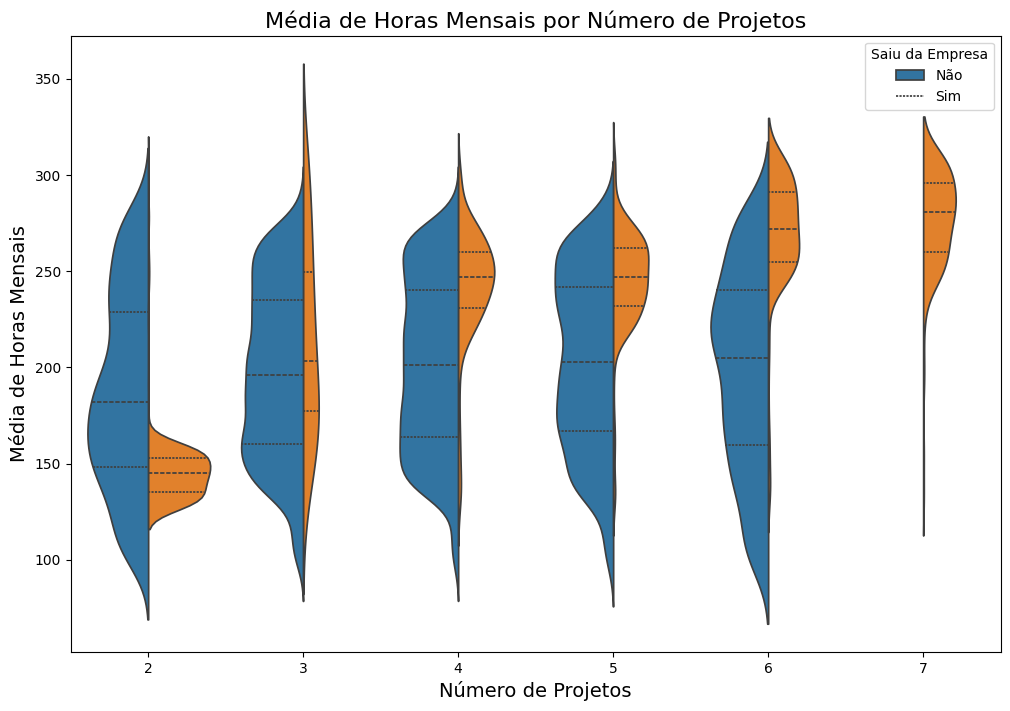

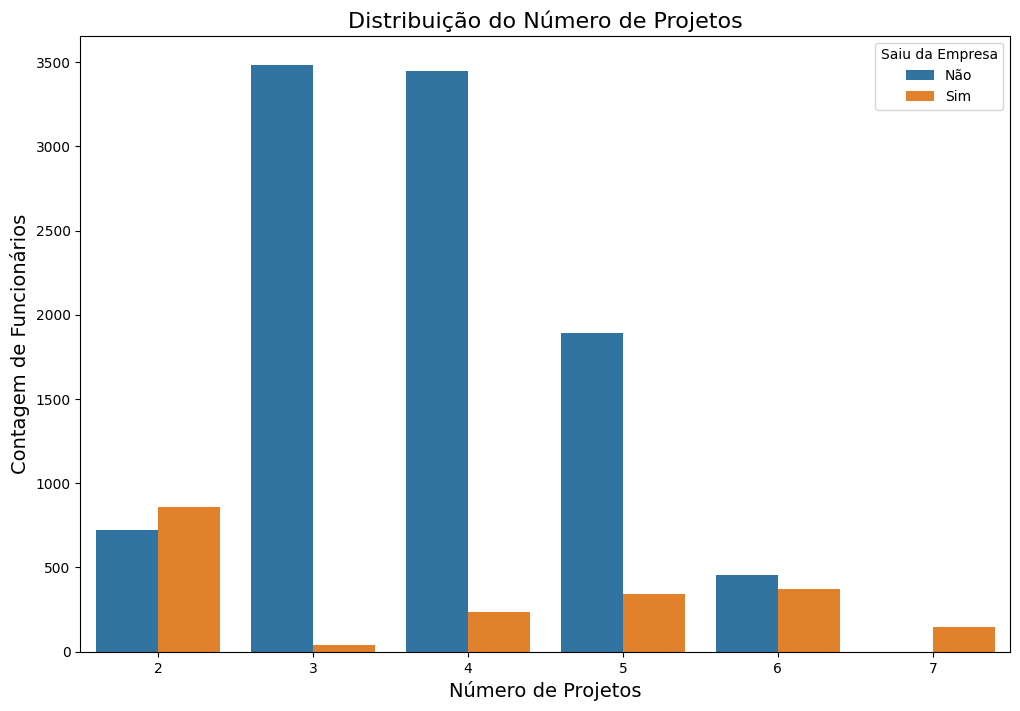

In [28]:
# Criando um violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=df1, x='numero_projetos', y='media_horas_mensais', hue='left', split=True, inner='quart')
plt.title('Média de Horas Mensais por Número de Projetos', fontsize=16)
plt.xlabel('Número de Projetos', fontsize=14)
plt.ylabel('Média de Horas Mensais', fontsize=14)
plt.legend(title='Saiu da Empresa', labels=['Não', 'Sim'])
plt.show()

# Criando um countplot
plt.figure(figsize=(12, 8))
sns.countplot(data=df1, x='numero_projetos', hue='left')
plt.title('Distribuição do Número de Projetos', fontsize=16)
plt.xlabel('Número de Projetos', fontsize=14)
plt.ylabel('Contagem de Funcionários', fontsize=14)
plt.legend(title='Saiu da Empresa', labels=['Não', 'Sim'])
plt.show()

### Relação entre `ultima_avaliacao` e `nivel_satisfacao`

**Sugestão de Adaptação:** Vamos usar um `scatterplot` com cores diferentes para quem saiu e quem ficou.

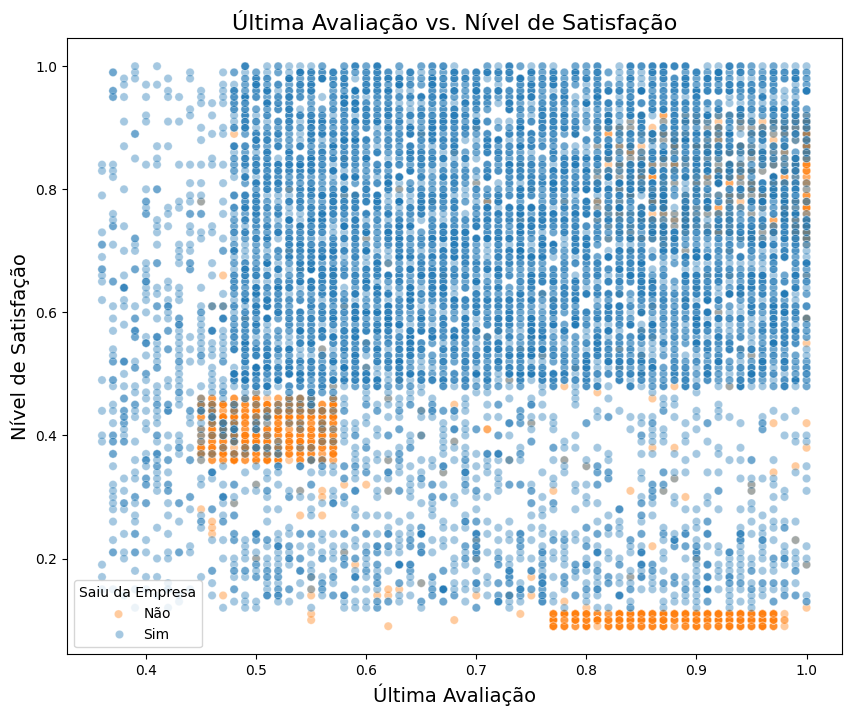

In [29]:
# Scatterplot de ultima_avaliacao vs. nivel_satisfacao
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df1, x='ultima_avaliacao', y='nivel_satisfacao', hue='left', alpha=0.4)
plt.title('Última Avaliação vs. Nível de Satisfação', fontsize=16)
plt.xlabel('Última Avaliação', fontsize=14)
plt.ylabel('Nível de Satisfação', fontsize=14)
plt.legend(title='Saiu da Empresa', labels=['Não', 'Sim'])
plt.show()

### Matriz de Correlação

**Sugestão de Adaptação:** Vamos usar um mapa de calor (`heatmap`) com uma paleta de cores diferente para visualizar as correlações.

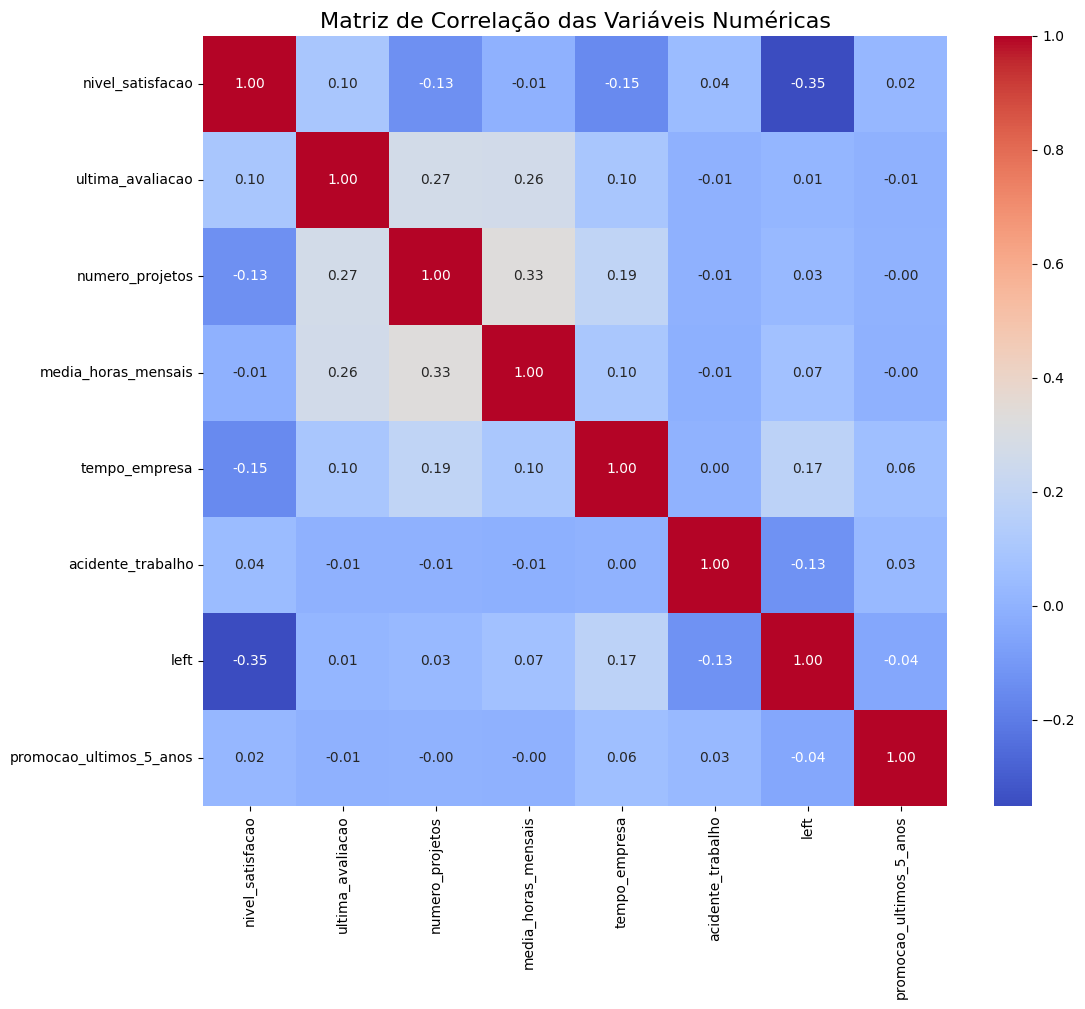

In [30]:
# Criando a matriz de correlação
# Adicionamos numeric_only=True para que a função ignore colunas de texto
corr_matrix = df1.corr(numeric_only=True)

# Plotando o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)
plt.show()

## **Pace: Construção do Modelo**

Nesta etapa, vamos construir um modelo de classificação para prever se um funcionário irá sair da empresa.

### Pré-processamento dos Dados

Vamos transformar as variáveis categóricas `salario` e `departamento` em variáveis dummy (one-hot encoding).

In [31]:
# Criando variáveis dummy para 'salario' e 'departamento'
df_encoded = pd.get_dummies(df1, columns=['departamento', 'salario'], drop_first=True)

print("### Dataframe com Variáveis Dummy ###")
print(df_encoded.head())

### Dataframe com Variáveis Dummy ###
   nivel_satisfacao  ultima_avaliacao  numero_projetos  media_horas_mensais  \
0              0.38              0.53                2                  157   
1              0.80              0.86                5                  262   
2              0.11              0.88                7                  272   
3              0.72              0.87                5                  223   
4              0.37              0.52                2                  159   

   tempo_empresa  acidente_trabalho  left  promocao_ultimos_5_anos  \
0              3                  0     1                        0   
1              6                  0     1                        0   
2              4                  0     1                        0   
3              5                  0     1                        0   
4              3                  0     1                        0   

   departamento_RandD  departamento_accounting  departamento_hr  \

### Divisão em Conjuntos de Treino e Teste

In [32]:
# Definindo as variáveis preditoras (X) e a variável alvo (y)
y = df_encoded['left']
X = df_encoded.drop('left', axis=1)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

### Construção e Treinamento do Modelo

**Sugestão de Adaptação:** O exemplar mostra vários modelos. Vamos focar em um **Random Forest Classifier** e usar `GridSearchCV` para encontrar os melhores hiperparâmetros.

In [33]:
# Inicializando o modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Definindo o grid de hiperparâmetros para o GridSearchCV
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5]
}

# Inicializando o GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Treinando o modelo com GridSearchCV
grid_search.fit(X_train, y_train)

# Obtendo o melhor modelo
best_rf = grid_search.best_estimator_

print(f"Melhores Hiperparâmetros: {grid_search.best_params_}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Melhores Hiperparâmetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## **Pace: Execução e Avaliação do Modelo**

Agora vamos avaliar o desempenho do nosso modelo de Random Forest.

### Relatório de Classificação ###
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2500
           1       0.99      0.92      0.96       498

    accuracy                           0.99      2998
   macro avg       0.99      0.96      0.97      2998
weighted avg       0.99      0.99      0.99      2998



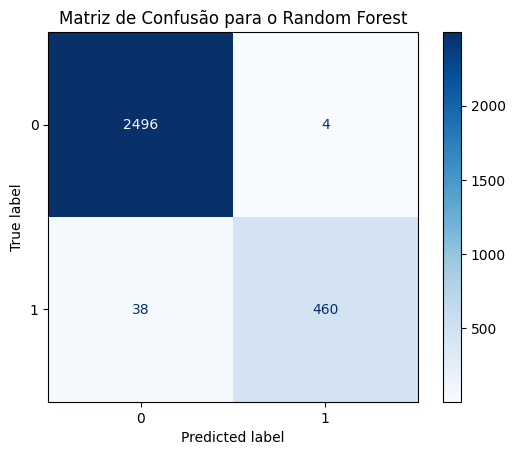

In [35]:
# Fazendo previsões no conjunto de teste
y_pred = best_rf.predict(X_test)

# Gerando o relatório de classificação
report = classification_report(y_test, y_pred)
print("### Relatório de Classificação ###")
print(report)

# Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=best_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão para o Random Forest')
plt.show()

### Importância das Features

Vamos visualizar as features (variáveis) mais importantes para o modelo tomar suas decisões.

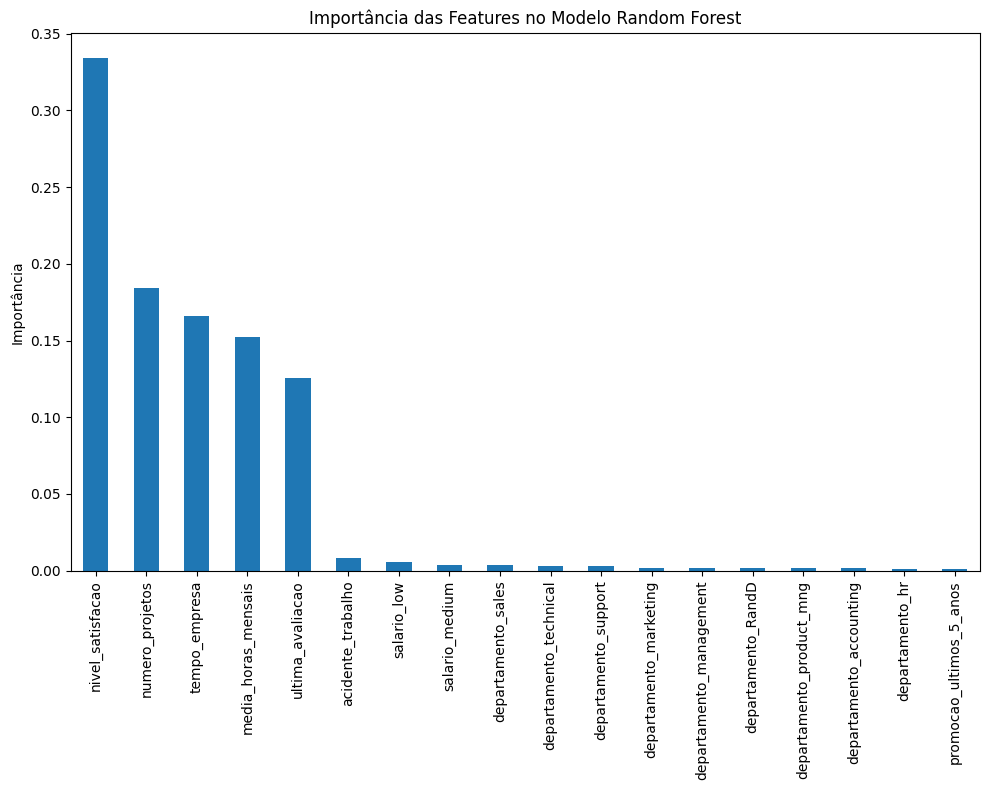

In [36]:
# Obtendo a importância das features
importances = best_rf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plotando a importância das features
fig, ax = plt.subplots(figsize=(10, 8))
forest_importances.plot.bar(ax=ax)
ax.set_title("Importância das Features no Modelo Random Forest")
ax.set_ylabel("Importância")
fig.tight_layout()
plt.show()

### Conclusão e Recomendações

Com base na análise e no modelo, observamos que as variáveis mais importantes para prever a saída de um funcionário são **nível de satisfação**, **tempo de empresa** e **número de projetos**.

**Recomendações para o RH:**
1.  **Monitorar o Nível de Satisfação:** Implementar pesquisas de clima organizacional mais frequentes, especialmente para funcionários com muito tempo de casa ou com muitos projetos.
2.  **Plano de Carreira:** Funcionários com 3 a 5 anos de empresa têm maior chance de sair. Criar um plano de carreira claro, com oportunidades de crescimento e promoções, pode ajudar a retê-los.
3.  **Gerenciamento da Carga de Trabalho:** O número de projetos é um fator crucial. É importante que o RH, junto com os gestores, equilibre a distribuição de projetos para evitar sobrecarga e esgotamento (`burnout`).